In [1]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 





## Composition Consumption and Cost Calculation

To accurately calculate the composition consumption and its corresponding cost for a given grade of steel, we follow a two-step process. This approach first determines the actual amount of composition used in kilograms (kg) and then calculates the cost based on the price per ton.

### Step 1: Calculate Composition Consumption in Kilograms (kg)

Given variables:
- `C` = Composition consumption rate in kg of composition per ton of billets
- `T` = Tons of billets produced

The formula to calculate the actual consumption of the composition (`A`) in kilograms (kg) for that grade of steel is:

$$\[A = C \times T\]$$

### Step 2: Convert Consumption into Cost

Given additional variable:
$$ `P` = Price of the sheet (or composition) per ton$$

Since the price `P` is provided per ton, and there are 1000 kg in a ton, we first convert the actual consumption from kilograms to tons (`A_tons`):

$$\[A_{\text{tons}} = \frac{A}{1000}\]$$

To calculate the total cost (`Cost`) of the composition based on its consumption and the sheet price per ton, we use the formula:

$$\[Cost = A_{\text{tons}} \times P\]$$

Combining the steps, we get the comprehensive formula for calculating cost:

$$\[Cost = \left( \frac{C \times T}{1000} \right) \times P\]$$

This formula allows us to calculate the total cost of the composition used based on its consumption rate per ton of billets produced, the total tons of billets produced, and the price per ton of the composition.
 
composition consumption in kg/ton * tons of billets produced = composition consumption in KG 
 1.   kg/ton * ton = kg you get the actual consumption of composition for that grade steel 
 2.   from 1, divide by 1000 to get ton, multiply the result by tth sheet price ton * (sheet price since its per ton) per composition.



## Prices for SMP2 Chemicals:

In [2]:


list_names_prices_smp1_december_2023 = {
    "FeSi - Ferro-Silicon":1562.52739907045,
    "FeSiMn - Silicon-maganese":986.290575415916,
    "FeMnHC - Ferro-Manganese (High Carbon)":1072.38676864388,
    "Recarburizer - Recarburizer":458.476134255355,
    'FeCr- ':0.0
}


list_names_prices_smp1_februrary_2024 = {
    "FeSi - Ferro-Silicon":1270.64396322791,
    "FeSiMn - Silicon-maganese":979.950501617602,
    "FeMnHC - Ferro-Manganese (High Carbon)":987.256404306629,
    "Recarburizer - Recarburizer":987.256404306629,
    'FeCr- ':0.0
}

list_names_prices_smp1_january_2024 = {
    "FeSi - Ferro-Silicon": 1321.21231855097 ,
    "FeSiMn - Silicon-maganese":980.828990060272,
    "FeMnHC - Ferro-Manganese (High Carbon)":1007.05074893469,
    "Recarburizer - Recarburizer":399.359191290486,
    'FeCr- ':0.0
}

list_names_prices_smp1_november_2023 = {
    "FeSi - Ferro-Silicon":1502.67462873706,
    "FeSiMn - Silicon-maganese":1082.79640299379,
    "FeMnHC - Ferro-Manganese (High Carbon)":1072.38799230385,
    "Recarburizer - Recarburizer":476.633106575964,
    'FeCr- ':0.0
}


# Convert dictionaries to a DataFrame
df = pd.DataFrame([
    list_names_prices_smp1_december_2023,
    list_names_prices_smp1_februrary_2024,
    list_names_prices_smp1_january_2024,
    list_names_prices_smp1_november_2023
])

mean_prices = df.mean()

list_names_prices_smp1_mean = mean_prices.to_dict()

list_names_prices_smp1_mean



{'FeSi - Ferro-Silicon': 1414.2645773965974,
 'FeSiMn - Silicon-maganese': 1007.4666175218949,
 'FeMnHC - Ferro-Manganese (High Carbon)': 1034.7704785472622,
 'Recarburizer - Recarburizer': 580.4312091071085,
 'FeCr- ': 0.0}

In [3]:

# FeSi - Ferro-Silicon average cost per 4 months:

(1562.52739907045 + 1270.64396322791 + 1321.21231855097 + 1502.67462873706) / 4


1414.2645773965974

In [4]:

# FeSiMn - Silicon-maganese average cost over 4 months
(986.290575415916 + 979.950501617602 + 980.828990060272 +  1082.79640299379) /4



1007.4666175218949

In [5]:

# choose SMP 
data = pd.read_csv("Ferroalloys Consumption SMP #1.csv")

# extract columns you are going to use for the analysis:
data = data[['SteelGrade', 
             'Billet',
             'FeSiMn Target (KG/Ton)',
             'FeSiMn Actual (KG/Ton)',
             'FeSi Target (KG/Ton)',
             'FeSi Actual (KG/Ton)', 
             ]]


# calculate overshot per Chemicals:
data['FeSiMn Overshot (KG/Ton)'] = data['FeSiMn Actual (KG/Ton)'] - data['FeSiMn Target (KG/Ton)']
data['FeSi Overshot (KG/Ton)'] = data['FeSi Actual (KG/Ton)'] - data['FeSi Target (KG/Ton)']
# 
# 
# # separate dataframe to do the calculations, to be more accurate and precise:
fesmin_data = data[["SteelGrade","Billet","FeSiMn Actual (KG/Ton)","FeSiMn Target (KG/Ton)","FeSiMn Overshot (KG/Ton)"]]
fesi_data = data[["SteelGrade","Billet","FeSi Actual (KG/Ton)","FeSi Target (KG/Ton)","FeSi Overshot (KG/Ton)"]]



### Rename columns to standardize them:

In [6]:

fesmin_data = fesmin_data.rename(columns={'Billet': 'Billet Mass (Tons)'})
fesi_data =  fesi_data.rename(columns={'Billet': 'Billet Mass (Tons)'})


### Add Suffix to duplicated steel grades names:

In [7]:

fesi_data['Suffix'] = fesi_data.groupby('SteelGrade').cumcount() + 1
fesi_data['SteelGrade_Unique'] = fesi_data['SteelGrade'] + '-' + fesi_data['Suffix'].astype(str)
fesi_data["SteelGrade"] = fesi_data["SteelGrade_Unique"]
fesi_data.drop(columns=['Suffix',"SteelGrade_Unique"], inplace=True)


In [8]:
# add unique name to steel grade

fesmin_data['Suffix'] = fesmin_data.groupby('SteelGrade').cumcount() + 1
fesmin_data['SteelGrade_Unique'] = fesmin_data['SteelGrade'] + '-' + fesmin_data['Suffix'].astype(str)
fesmin_data["SteelGrade"] = fesmin_data["SteelGrade_Unique"]
fesmin_data.drop(columns=['Suffix',"SteelGrade_Unique"], inplace=True)


### Filter columns where target must not equal 0 and overshot must be greater than 0.0:

In [9]:

# filter columns you are interested in:
# first condition target must be greater than 0.0:
fesmin_data = fesmin_data[fesmin_data["FeSiMn Target (KG/Ton)"]!= 0.0]

# second condition overshot must be > 0.0 
fesmin_data = fesmin_data[fesmin_data["FeSiMn Overshot (KG/Ton)"] > 0.0]



In [10]:

# filter columns you are interested in:
# first condition target must be greater than 0.0:
fesi_data = fesi_data[fesi_data["FeSi Target (KG/Ton)"]!= 0.0]

# second condition overshot must be > 0.0 
fesi_data = fesi_data[fesi_data["FeSi Overshot (KG/Ton)"] > 0.0]



In [11]:

mean_cost_per_ton_FeSiMn = 1007.4666175218949

# get consumption per kg by multiplying with kg/ton of produced billet mass:
fesmin_data["FeSiMn Overshot (KG)"] = fesmin_data["FeSiMn Overshot (KG/Ton)"]  * fesmin_data["Billet Mass (Tons)"] 

# get consumption in tons by dividing kg by 1000:
fesmin_data["FeSiMn Overshot (Tons)"] = fesmin_data["FeSiMn Overshot (KG)"]/1000

# calculate the cost of over shot by multiplying the tons used buy the cost per ton:
fesmin_data["FeSiMn Overshot (Cost$)"] = fesmin_data["FeSiMn Overshot (Tons)"] * mean_cost_per_ton_FeSiMn


fesmin_data


,SteelGrade,Billet Mass (Tons),FeSiMn Actual (KG/Ton),FeSiMn Target (KG/Ton),FeSiMn Overshot (KG/Ton),FeSiMn Overshot (KG),FeSiMn Overshot (Tons),FeSiMn Overshot (Cost$)
6,AISI 1005-RM03-1,2998.133,4.66,4.53,0.13,389.75729,0.389757,392.667459
7,AISI 1005-RM03-2,13236.458,5.22,4.53,0.69,9133.15602,9.133156,9201.349803
8,AISI 1006-RM03-1,9652.346,5.27,5.07,0.20,1930.46920,1.930469,1944.883275
9,AISI 1006-RM03-2,56329.480,5.17,5.07,0.10,5632.94800,5.632948,5675.007068
10,AISI 1008-RM03-1,4932.591,6.27,5.74,0.53,2614.27323,2.614273,2633.793008
11,AISI 1008-RM03-2,61650.462,6.23,5.74,0.49,30208.72638,30.208726,30434.283386
12,AISI 1010-RM03-1,1386.720,6.72,5.43,1.29,1788.86880,1.788869,1802.225599
13,AISI 1012-RM03-1,340.998,8.03,5.43,2.60,886.59480,0.886595,893.214664
14,AISI 1012-RM03-2,7888.672,7.46,5.43,2.03,16014.00416,16.014004,16133.574604
15,AISI 1015-RM03-1,14620.995,6.84,5.43,1.41,20615.60295,20.615603,20769.531772


In [12]:

fesmin_data["FeSiMn Overshot (Cost$)"].sum()


97786.62070823522

In [13]:

mean_cost_per_ton_FeSi = 1414.2645773965974

# get consumption per kg by multiplying with kg/ton of produced billet mass:
fesi_data["FeSi Overshot (KG)"] = fesi_data["FeSi Overshot (KG/Ton)"]  * fesi_data["Billet Mass (Tons)"]

# get consumption in tons by dividing kg by 1000:
fesi_data["FeSi Overshot (Tons)"] = fesi_data["FeSi Overshot (KG)"]/1000

# calculate the cost of over shot by multiplying the tons used buy the cost per ton:
fesi_data["FeSi Overshot (Cost$)"] = fesi_data["FeSi Overshot (Tons)"] * mean_cost_per_ton_FeSi

fesi_data


,SteelGrade,Billet Mass (Tons),FeSi Actual (KG/Ton),FeSi Target (KG/Ton),FeSi Overshot (KG/Ton),FeSi Overshot (KG),FeSi Overshot (Tons),FeSi Overshot (Cost$)
6,AISI 1005-RM03-1,2998.133,1.23,0.36,0.87,2608.37571,2.608376,3688.933371
7,AISI 1005-RM03-2,13236.458,1.36,0.36,1.00,13236.45800,13.236458,18719.853680
8,AISI 1006-RM03-1,9652.346,1.24,0.69,0.55,5308.79030,5.308790,7508.034070
9,AISI 1006-RM03-2,56329.480,1.38,0.69,0.69,38867.34120,38.867341,54968.703877
10,AISI 1008-RM03-1,4932.591,1.00,0.27,0.73,3600.79143,3.600791,5092.471770
11,AISI 1008-RM03-2,61650.462,1.40,0.27,1.13,69665.02206,69.665022,98524.772983
13,AISI 1012-RM03-1,340.998,1.98,1.71,0.27,92.06946,0.092069,130.210576
23,BSG500BR41-RM01-1,36411.089,1.46,1.20,0.26,9466.88314,9.466883,13388.677483
28,BSG500BR42-RM03-1,15111.253,1.50,1.10,0.40,6044.50120,6.044501,8548.523935
49,KWSB500BWR R22-RM02-1,298.074,2.00,1.71,0.29,86.44146,0.086441,122.251095


In [14]:

fesi_data["FeSi Overshot (Cost$)"].sum()


214935.7999433248

### Overall cost:

In [15]:


fesmin_data["FeSiMn Overshot (Cost$)"].sum() + fesi_data["FeSi Overshot (Cost$)"].sum() 



312722.42065156

In [16]:


fesmin_data["FeSiMn Overshot (Tons)"].sum()


97.06189664999998

In [17]:

fesi_data["FeSi Overshot (Tons)"].sum()


151.97707937999996

### Overall (Tons) overshot:

In [18]:

fesmin_data["FeSiMn Overshot (Tons)"].sum() + fesi_data["FeSi Overshot (Tons)"].sum()


249.03897602999996

### Merge two chemicals results, fill nan and sum results:

In [19]:


final_results = pd.merge(fesi_data, fesmin_data, on=['SteelGrade', 'Billet Mass (Tons)'],how="outer")
# final_results = pd.merge(fesi_data, fesmin_data, on=['SteelGrade'],how="outer")

# to ensure that you won't get null result from summing two columns that one include null and the other is int you will get null value and it will lead to misleading results:
final_results.fillna(0.0, inplace=True)



In [20]:

final_results["Ferroalloys Overshot (KG/Ton)"] = final_results["FeSiMn Overshot (KG/Ton)"] + final_results["FeSi Overshot (KG/Ton)"]
final_results["Ferroalloys Overshot (Tons)"] =  final_results["FeSiMn Overshot (Tons)"] + final_results["FeSi Overshot (Tons)"]
final_results["Ferroalloys Overshot Cost ($USD)"] = final_results["FeSiMn Overshot (Cost$)"] + final_results["FeSi Overshot (Cost$)"]


In [21]:

fesmin_data["FeSiMn Overshot (Cost$)"].sum() + fesi_data["FeSi Overshot (Cost$)"].sum()



312722.42065156

In [22]:

fesmin_data["FeSiMn Overshot (Tons)"].sum() + fesi_data["FeSi Overshot (Tons)"].sum()


249.03897602999996

In [23]:


final_results["FeSi Overshot (Cost$)"].sum() + final_results["FeSiMn Overshot (Cost$)"].sum()


312722.42065156007

In [24]:

final_results["FeSi Overshot (Tons)"].sum() + final_results["FeSiMn Overshot (Tons)"].sum()


249.03897602999996

In [25]:

final_results["Ferroalloys Overshot (Tons)"].sum()



249.03897602999996

In [26]:

final_results["Ferroalloys Overshot Cost ($USD)"].sum()


312722.42065156007

### Sum numerical columns and create "total" row:

In [27]:

totals = final_results.select_dtypes(include=[np.number]).sum().rename('Total')
totals['SteelGrade'] = 'Total'
final_results = pd.concat([final_results, pd.DataFrame([totals])], ignore_index=True)
final_results


,SteelGrade,Billet Mass (Tons),FeSi Actual (KG/Ton),FeSi Target (KG/Ton),FeSi Overshot (KG/Ton),FeSi Overshot (KG),FeSi Overshot (Tons),FeSi Overshot (Cost$),FeSiMn Actual (KG/Ton),FeSiMn Target (KG/Ton),FeSiMn Overshot (KG/Ton),FeSiMn Overshot (KG),FeSiMn Overshot (Tons),FeSiMn Overshot (Cost$),Ferroalloys Overshot (KG/Ton),Ferroalloys Overshot (Tons),Ferroalloys Overshot Cost ($USD)
0,AISI 1005-RM03-1,2998.133,1.23,0.36,0.87,2608.37571,2.608376,3688.933371,4.66,4.53,0.13,389.75729,0.389757,392.667459,1.00,2.998133,4081.600830
1,AISI 1005-RM03-2,13236.458,1.36,0.36,1.00,13236.45800,13.236458,18719.853680,5.22,4.53,0.69,9133.15602,9.133156,9201.349803,1.69,22.369614,27921.203482
2,AISI 1006-RM03-1,9652.346,1.24,0.69,0.55,5308.79030,5.308790,7508.034070,5.27,5.07,0.20,1930.46920,1.930469,1944.883275,0.75,7.239259,9452.917345
3,AISI 1006-RM03-2,56329.480,1.38,0.69,0.69,38867.34120,38.867341,54968.703877,5.17,5.07,0.10,5632.94800,5.632948,5675.007068,0.79,44.500289,60643.710945
4,AISI 1008-RM03-1,4932.591,1.00,0.27,0.73,3600.79143,3.600791,5092.471770,6.27,5.74,0.53,2614.27323,2.614273,2633.793008,1.26,6.215065,7726.264778
5,AISI 1008-RM03-2,61650.462,1.40,0.27,1.13,69665.02206,69.665022,98524.772983,6.23,5.74,0.49,30208.72638,30.208726,30434.283386,1.62,99.873748,128959.056369
6,AISI 1010-RM03-1,1386.720,0.00,0.00,0.00,0.00000,0.000000,0.000000,6.72,5.43,1.29,1788.86880,1.788869,1802.225599,1.29,1.788869,1802.225599
7,AISI 1012-RM03-1,340.998,1.98,1.71,0.27,92.06946,0.092069,130.210576,8.03,5.43,2.60,886.59480,0.886595,893.214664,2.87,0.978664,1023.425240
8,AISI 1012-RM03-2,7888.672,0.00,0.00,0.00,0.00000,0.000000,0.000000,7.46,5.43,2.03,16014.00416,16.014004,16133.574604,2.03,16.014004,16133.574604
9,AISI 1015-RM03-1,14620.995,0.00,0.00,0.00,0.00000,0.000000,0.000000,6.84,5.43,1.41,20615.60295,20.615603,20769.531772,1.41,20.615603,20769.531772


In [28]:




# Check if all 'Steel Grade' values in df2 are present in df1
all_in_reverse = fesmin_data["SteelGrade"].isin(final_results["SteelGrade"]).all()

all_in_reverse




True

In [29]:


all_in_reverse = fesi_data["SteelGrade"].isin(final_results["SteelGrade"]).all()

all_in_reverse



True

In [30]:
numerical_columns = ['Billet Mass (Tons)',
                     'FeSi Actual (KG/Ton)',
                     'FeSi Target (KG/Ton)',
                     'FeSi Overshot (KG/Ton)',
                     'FeSi Overshot (KG)',
                     'FeSi Overshot (Tons)',
                     'FeSi Overshot (Cost$)',
                     'FeSiMn Actual (KG/Ton)',
                     'FeSiMn Target (KG/Ton)',
                     'FeSiMn Overshot (KG/Ton)',
                     'FeSiMn Overshot (KG)',
                     'FeSiMn Overshot (Tons)',
                     'FeSiMn Overshot (Cost$)',
                     'Ferroalloys Overshot (KG/Ton)',
                     'Ferroalloys Overshot (Tons)',
                     'Ferroalloys Overshot Cost ($USD)']

final_results[numerical_columns] = final_results[numerical_columns].astype(float)

numerical_df = final_results.select_dtypes(include=[np.number])


for col in numerical_columns:
    final_results[col] = final_results[col].apply(lambda x: f"{x:.2f}")

final_results[numerical_columns] = final_results[numerical_columns].astype(float)



### Validate Again:

In [31]:


fesi_data["FeSi Actual (KG/Ton)"].sum()


16.060000000000002

In [32]:

fesi_data["FeSi Target (KG/Ton)"].sum()


9.049999999999999

In [33]:

fesi_data["Billet Mass (Tons)"].sum() + fesmin_data["Billet Mass (Tons)"].sum()


388227.55799999996

In [34]:

fesi_data["FeSi Overshot (KG/Ton)"].sum() + fesmin_data["FeSiMn Overshot (KG/Ton)"].sum()



18.41

In [35]:

fesmin_data["FeSiMn Overshot (Tons)"].sum() + fesi_data["FeSi Overshot (Tons)"].sum()


249.03897602999996

In [36]:

fesmin_data["FeSiMn Overshot (Cost$)"].sum() + fesi_data["FeSi Overshot (Cost$)"].sum()


312722.42065156

In [37]:

fesmin_data["FeSiMn Overshot (Cost$)"].sum()


97786.62070823522

In [38]:


fesi_data["Billet Mass (Tons)"].sum() + fesmin_data["Billet Mass (Tons)"].sum()


388227.55799999996

In [39]:


fesmin_data["FeSi Overshot (Cost$)"].sum()


KeyError: 'FeSi Overshot (Cost$)'

In [41]:


fesmin_data["FeSiMn Overshot (KG/Ton)"].sum() + fesi_data["FeSi Overshot (KG/Ton)"].sum()


18.41

In [42]:


fesmin_data["FeSiMn Overshot (Tons)"].sum() + fesi_data["FeSi Overshot (Tons)"].sum()


249.03897602999996

In [ ]:


final_results[final_results["SteelGrade"] == "Total"]


In [ ]:


fesmin_data["FeSiMn Overshot (Cost$)"].sum()


In [ ]:

fesi_data["FeSi Overshot (Cost$)"].sum()


In [ ]:

fesmin_data["FeSiMn Overshot (Cost$)"].sum() + fesi_data["FeSi Overshot (Cost$)"].sum()



In [ ]:

fesmin_data["FeSiMn Overshot (Tons)"].sum() + fesi_data["FeSi Overshot (Tons)"].sum()



In [ ]:

final_results["SteelGrade"].nunique()




SMP1 2023 Base estimates:
FeSiMn overshot Cost: 97786 USD 
FeSi Overshot Cost: 214935 USD 
Overall Cost: 312722 USD 
Ferroalloys Overshot (Tons): 249



In [43]:


final_results_ff = final_results.drop(columns=["Billet Mass (Tons)"])
final_results_ff.style.background_gradient(cmap="Greens")


,SteelGrade,FeSi Actual (KG/Ton),FeSi Target (KG/Ton),FeSi Overshot (KG/Ton),FeSi Overshot (KG),FeSi Overshot (Tons),FeSi Overshot (Cost$),FeSiMn Actual (KG/Ton),FeSiMn Target (KG/Ton),FeSiMn Overshot (KG/Ton),FeSiMn Overshot (KG),FeSiMn Overshot (Tons),FeSiMn Overshot (Cost$),Ferroalloys Overshot (KG/Ton),Ferroalloys Overshot (Tons),Ferroalloys Overshot Cost ($USD)
0,AISI 1005-RM03-1,1.230000,0.360000,0.870000,2608.380000,2.610000,3688.930000,4.660000,4.530000,0.130000,389.760000,0.390000,392.670000,1.000000,3.000000,4081.600000
1,AISI 1005-RM03-2,1.360000,0.360000,1.000000,13236.460000,13.240000,18719.850000,5.220000,4.530000,0.690000,9133.160000,9.130000,9201.350000,1.690000,22.370000,27921.200000
2,AISI 1006-RM03-1,1.240000,0.690000,0.550000,5308.790000,5.310000,7508.030000,5.270000,5.070000,0.200000,1930.470000,1.930000,1944.880000,0.750000,7.240000,9452.920000
3,AISI 1006-RM03-2,1.380000,0.690000,0.690000,38867.340000,38.870000,54968.700000,5.170000,5.070000,0.100000,5632.950000,5.630000,5675.010000,0.790000,44.500000,60643.710000
4,AISI 1008-RM03-1,1.000000,0.270000,0.730000,3600.790000,3.600000,5092.470000,6.270000,5.740000,0.530000,2614.270000,2.610000,2633.790000,1.260000,6.220000,7726.260000
5,AISI 1008-RM03-2,1.400000,0.270000,1.130000,69665.020000,69.670000,98524.770000,6.230000,5.740000,0.490000,30208.730000,30.210000,30434.280000,1.620000,99.870000,128959.060000
6,AISI 1010-RM03-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.720000,5.430000,1.290000,1788.870000,1.790000,1802.230000,1.290000,1.790000,1802.230000
7,AISI 1012-RM03-1,1.980000,1.710000,0.270000,92.070000,0.090000,130.210000,8.030000,5.430000,2.600000,886.590000,0.890000,893.210000,2.870000,0.980000,1023.430000
8,AISI 1012-RM03-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.460000,5.430000,2.030000,16014.000000,16.010000,16133.570000,2.030000,16.010000,16133.570000
9,AISI 1015-RM03-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.840000,5.430000,1.410000,20615.600000,20.620000,20769.530000,1.410000,20.620000,20769.530000


In [44]:
final_results_ff[["SteelGrade", "FeSiMn Overshot (Tons)", "FeSiMn Overshot (Cost$)", "FeSi Overshot (Tons)", "FeSi Overshot (Cost$)","Ferroalloys Overshot (Tons)","Ferroalloys Overshot Cost ($USD)"]].style.background_gradient(cmap="Greens")


,SteelGrade,FeSiMn Overshot (Tons),FeSiMn Overshot (Cost$),FeSi Overshot (Tons),FeSi Overshot (Cost$),Ferroalloys Overshot (Tons),Ferroalloys Overshot Cost ($USD)
0,AISI 1005-RM03-1,0.390000,392.670000,2.610000,3688.930000,3.000000,4081.600000
1,AISI 1005-RM03-2,9.130000,9201.350000,13.240000,18719.850000,22.370000,27921.200000
2,AISI 1006-RM03-1,1.930000,1944.880000,5.310000,7508.030000,7.240000,9452.920000
3,AISI 1006-RM03-2,5.630000,5675.010000,38.870000,54968.700000,44.500000,60643.710000
4,AISI 1008-RM03-1,2.610000,2633.790000,3.600000,5092.470000,6.220000,7726.260000
5,AISI 1008-RM03-2,30.210000,30434.280000,69.670000,98524.770000,99.870000,128959.060000
6,AISI 1010-RM03-1,1.790000,1802.230000,0.000000,0.000000,1.790000,1802.230000
7,AISI 1012-RM03-1,0.890000,893.210000,0.090000,130.210000,0.980000,1023.430000
8,AISI 1012-RM03-2,16.010000,16133.570000,0.000000,0.000000,16.010000,16133.570000
9,AISI 1015-RM03-1,20.620000,20769.530000,0.000000,0.000000,20.620000,20769.530000


/var/folders/r9/87gtbty52c79d176x87qqc1c0000gn/T/ipykernel_9082/2900433435.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SteelGrade', x='Ferroalloys Overshot Cost ($USD)', data=fff, palette="coolwarm", orient='h')


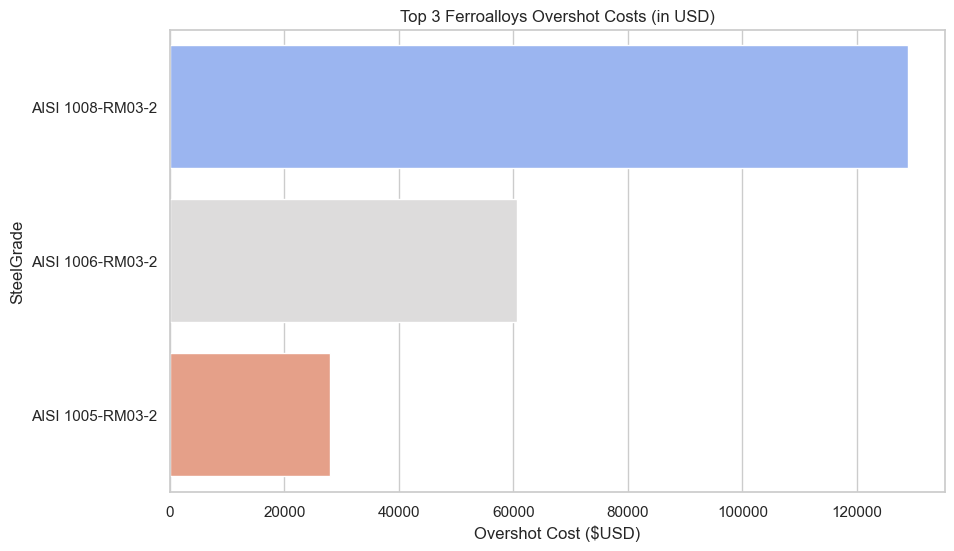

In [124]:


final_results_fff = final_results[final_results["SteelGrade"]!= "Total"]
fff = final_results_fff.nlargest(3, 'Ferroalloys Overshot Cost ($USD)')



/var/folders/r9/87gtbty52c79d176x87qqc1c0000gn/T/ipykernel_9082/3067459622.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SteelGrade', x='Ferroalloys Overshot Cost ($USD)', data=fff, palette="coolwarm", orient='h')


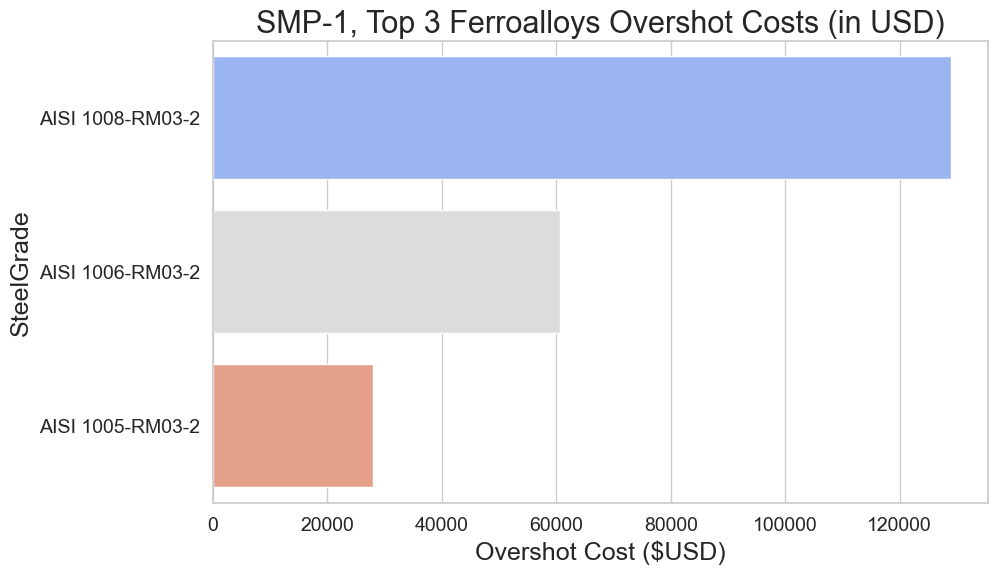

In [134]:

import seaborn as sns



final_results_fff = final_results[final_results["SteelGrade"]!= "Total"]
fff = final_results_fff.nlargest(3, 'Ferroalloys Overshot Cost ($USD)')


# Setting the theme for Seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(y='SteelGrade', x='Ferroalloys Overshot Cost ($USD)', data=fff, palette="coolwarm", orient='h')
plt.title('SMP-1, Top 3 Ferroalloys Overshot Costs (in USD)', fontsize=22)
plt.ylabel('SteelGrade', fontsize=18)
plt.xlabel('Overshot Cost ($USD)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
